In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, auc, confusion_matrix, accuracy_score
from sklearn.utils import resample, shuffle

In [2]:
!pip install pydotplus

     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 330.3 kB/s eta 0:00:01
     -------- ---------------------------- 61.4/278.7 kB 656.4 kB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24574 sha256=d7176fbd8630797ad2f362ef010f79e50bae90329ca6196e37cd40a7bed2c3a1
  Stored in directory: c:\users\bhavya\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [3]:
import pydotplus as pdot

In [4]:
data=pd.read_csv(r"C:\Users\Bhavya\Downloads\Bank target marketing dataset - Gain-Lift chart-20241122T051703Z-001\Bank target marketing dataset - Gain-Lift chart\archive\bank.csv")

In [5]:
data.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [7]:
num_col=[col for col in data.columns if data[col].dtype=='int64']
print(num_col)
cat_col=[col for col in data.columns if data[col].dtype=='object']
print(cat_col)

['age', 'balance', 'current-campaign', 'previous-campaign']
['job', 'marital', 'education', 'default', 'housing-loan', 'personal-loan', 'subscribed']


<Axes: title={'center': 'Count of subscribers for term deposit'}, xlabel='subscribed', ylabel='no_of_subscribers'>

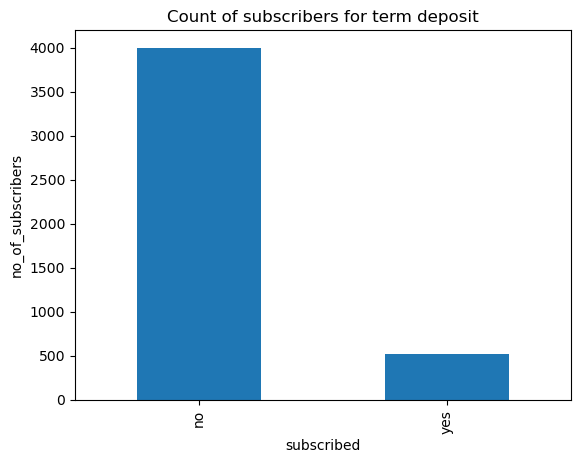

In [9]:
data['subscribed'].value_counts().plot(kind='bar',xlabel='subscribed',ylabel='no_of_subscribers',title='Count of subscribers for term deposit')

In [12]:
for col in cat_col:
    vc=data[col].value_counts()
    print("for cat features {} values are:\n{}".format(col,vc))

for cat features job values are:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64
for cat features marital values are:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
for cat features education values are:
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64
for cat features default values are:
default
no     4445
yes      76
Name: count, dtype: int64
for cat features housing-loan values are:
housing-loan
yes    2559
no     1962
Name: count, dtype: int64
for cat features personal-loan values are:
personal-loan
no     3830
yes     691
Name: count, dtype: int64
for cat features subscribed values are:
subscribed
no     4000
yes     521
Name: count, dtype: int64


In [13]:
####Logistic Regression Model

X=data.drop('subscribed',axis=1)
y=data['subscribed']

X=pd.get_dummies(X,columns=['job','marital','education','default','housing-loan','personal-loan'],
                   drop_first=True)

y = y.map({'yes': 1,
           'no': 0}
         )

In [23]:
X_train, X_test,y_train, y_test = train_test_split(X, y,
                                       test_size=0.20,
                                       random_state=23)

In [24]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(random_state=0)
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

In [25]:
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 89.8342541436464


In [32]:
X_n=X.drop('const',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_n,y, test_size=0.20, random_state=42)
tree1 = DecisionTreeClassifier(criterion = 'gini', max_depth=10)
tree1.fit(X_train,y_train)
score = tree1.score(X_test, y_test)
pred_y = tree1.predict(X_test)
accuracy = accuracy_score(y_test,pred_y)
print("Score: ", score)
print("Accuray of model: ", accuracy)

Score:  0.861878453038674
Accuray of model:  0.861878453038674


In [33]:
# confusion matrix
def confusion_matri(actual, predicted):
    cm = confusion_matrix(actual, predicted, labels=[1,0])
    tp, fn, fp, tn = cm.ravel()
    #plot confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='.2f', 
                xticklabels =['subscribed','not subscribed'],
                yticklabels =['subscribed','not subscribed'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted lable')
    plt.title("Confusion Matrix")
    plt.show()
    return tn,fp,fn,tp

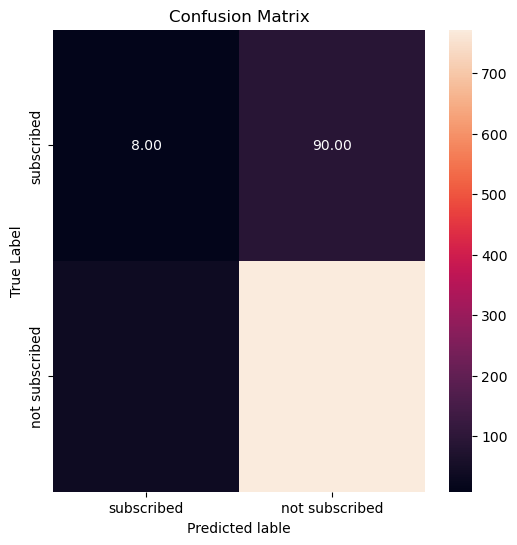

(772, 35, 90, 8)

In [34]:
confusion_matri(y_test, pred_y)

In [35]:
#decision tree classifier 2 
tree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10)
tree2.fit(X_train,y_train)
score2 = tree2.score(X_test, y_test)
pred_y2 = tree2.predict(X_test)
accuracy2 = accuracy_score(y_test,pred_y)
print("Score 2 : ", score2)
print("Accuray of model 2: ", accuracy2)

Score 2 :  0.8696132596685083
Accuray of model 2:  0.861878453038674


In [37]:
# creat full data frame with total observations
d_n = pd.concat([X_n,y], axis=1)

#seperate the yes-subscribed and no-subscribed
data_no = d_n[d_n['subscribed'] == 0]
data_yes = d_n[d_n['subscribed'] == 1]

# upsample teh minority dataframe
data_upsampled = resample(data_yes,
                       replace=True,
                       n_samples=2600)

# concat to create final dataset
final_data = pd.concat([data_no,data_upsampled])

# shuffle the data set
final_data = shuffle(final_data)
final_data['subscribed'].value_counts()

subscribed
0    4000
1    2600
Name: count, dtype: int64

In [38]:
# Build model using Decision tree clssifier
Xn = final_data.drop('subscribed', axis=1)
yn = final_data.subscribed

# train and test dataset
X_trn, X_tst, y_trn, y_tst = train_test_split(Xn,yn, test_size=0.20, random_state=42)

# Decision tree model
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=14, random_state=42)
tree3.fit(X_trn, y_trn)
pred = tree3.predict(X_tst)
accuracy3 = accuracy_score(y_tst, pred)
print("Accuracy score of the model: ", accuracy3)

Accuracy score of the model:  0.8159090909090909


In [39]:
report = classification_report(y_tst, pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       795
           1       0.78      0.75      0.76       525

    accuracy                           0.82      1320
   macro avg       0.81      0.80      0.81      1320
weighted avg       0.81      0.82      0.82      1320

